In [1]:
! pip install tensorflow_datasets

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [14]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

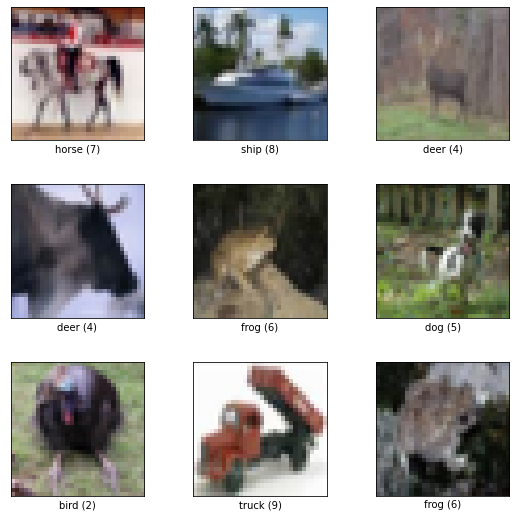

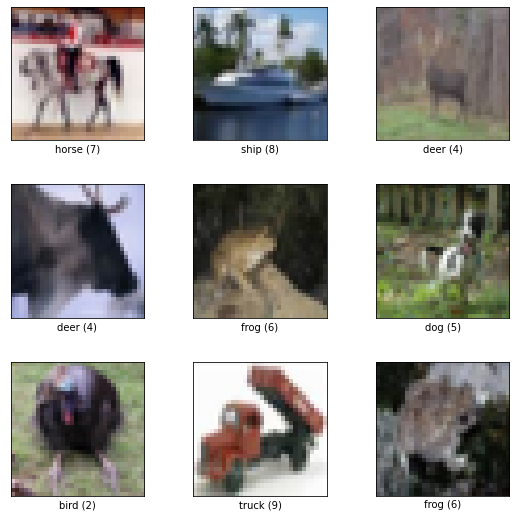

In [18]:
tfds.show_examples(ds_train, ds_info)

In [21]:
print(ds_info.features["label"].num_classes)
print(ds_info.features["label"].names)
print(ds_info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(ds_info.features["label"].str2int('cat'))

10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
horse
3


In [22]:
print(ds_info.features.shape)
print(ds_info.features.dtype)
print(ds_info.features['image'].shape)
print(ds_info.features['image'].dtype)

{'id': (), 'image': (32, 32, 3), 'label': ()}
{'id': tf.string, 'image': tf.uint8, 'label': tf.int64}
(32, 32, 3)
<dtype: 'uint8'>


In [19]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [23]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation="relu"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
 52/391 [==>...........................] - ETA: 45s - loss: 2.0133 - sparse_categorical_accuracy: 0.2832

KeyboardInterrupt: ignored